In [1]:
import PyCESat2 as pysat
import numpy as np
from tqdm import tqdm

In [43]:
# filename = "../../../Kd_from_ATLAS/Data/Amsterdam/OpenAlt_Download/processed_ATL03_20190331065528_00310302_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Civitavecchia/OpenAlt_Download/processed_ATL03_20190803003708_05490402_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Lake_Victoria/OpenAlt_Download/processed_ATL03_20191220043548_12870507_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Bohai_Bay/OpenAlt_Download/processed_ATL03_20190401113710_00490306_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Guaraquecaba/OpenAlt_Download/processed_ATL03_20200510152305_06880714_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Hawaii/OpenAlt_Download/processed_ATL03_20190107095739_01520207_003_01.h5"
filename = "../../../Kd_from_ATLAS/Data/Faro/OpenAlt_Download/processed_ATL03_20190314205317_11670206_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Bosporous/OpenAlt_Download/processed_ATL03_20190308184422_10740206_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Marsa_Al_Brega/OpenAlt_Download/processed_ATL03_20200301140708_10060602_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/South_Georgia_Isle/OpenAlt_Download/processed_ATL03_20190516193409_07410310_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Port_Ubay/OpenAlt_Download/processed_ATL03_20190114144925_02620207_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Auckland/OpenAlt_Download/processed_ATL03_20190809020453_06410410_003_01.h5"
# filename = "../../../Kd_from_ATLAS/Data/Sinop/OpenAlt_Download/processed_ATL03_20200304125008_10510602_003_01.h5"

0.7731186923354086
-0.10430521125251363


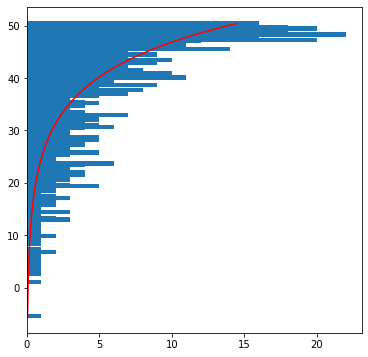

In [56]:
def hl(c):
    def horizontal_line(d):
        return c
    return horizontal_line

def calculate_r2(obj, surface, d):
    
    obj = obj.below(surface)
    bottom = hl(obj[surface]["height"].mean() - 50.0)
    obj = obj.add_modeled_surface("bottom", bottom, obj.distance).above("bottom")
    
    wf = obj.bin(win_h=0.1,win_x=d-0.1)[0][1].fit_curve()
    
    return wf.r2, wf, obj

atl = pysat.ATL03(filename)
r = atl.gt3r.RANSAC("R1", residual_threshold = 1.8).outliers("R1").below("R1")
r = r.add_modeled_surface("bottom",hl(-1000),r.distance).above("bottom")
r = r.bin(win_h=0.1, win_x=r.distance.max()-0.1)[0][1].fit_curve()
print(r.r2)
print(r.curve_params["c"])
r.plot()

In [59]:
def hl(c):
    def horizontal_line(d):
        return c
    return horizontal_line

def calculate_r2(obj, surface, d):
    
    obj = obj.below(surface)
    bottom = hl(obj[surface]["height"].mean() - 50.0)
    obj = obj.add_modeled_surface("bottom", bottom, obj.distance).above("bottom")
    
    wf = obj.bin(win_h=0.1,win_x=d-0.1)[0][1].fit_curve()
    
    return wf.r2, wf, obj

In [60]:
d = max(r.distance)

r2s = []
columns = []
waves = []

for i in tqdm(range(10)): 
    try:
        r = r.RANSAC("R{}".format(i))
        r2, wf, obj = calculate_r2(r, "R{}".format(i), d)
        r2s.append(r2)
        columns.append(obj)
        waves.append(wf)


        r2, wf, obj = calculate_r2(r.outliers("R{}".format(i)), "R{}".format(i), d)
        r2s.append(r2)
        columns.append(obj)
        waves.append(wf)
    except:
        break
    
    r = obj
    
i = np.where(r2s == max(r2s))[0][0]

    
print(r2s[i])
print(waves[i].curve_params['c'])
waves[i].plot()
columns[i].plot()

  0%|          | 0/10 [00:48<?, ?it/s]


ValueError: max() arg is an empty sequence

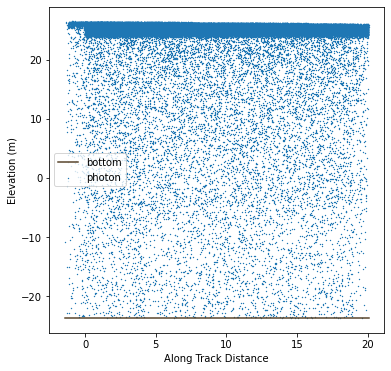

In [35]:
obj.plot()

In [62]:
d = max(r.distance)

r2s = []
plots = []
kds = []

plots.append(r.below("R1"))
r_kd = r.below("R1").bin(win_h=0.1, win_x=d-0.1)[0][1].fit_curve()
r2s.append(r_kd.r2)
kds.append(r_kd)


r = r.outliers("R1").below("R1").plot()

r_bin = r.bin(win_h=0.1, win_x=d-0.1)[0][1]
r_kd = r_bin.fit_curve()

r2s.append(r_kd.r2)
plots.append(r)
kds.append(r_kd)

counter = 2
while counter < 10:
    try:
        r = r.RANSAC("R{0}".format(counter))
        r = r.below("R{0}".format(counter))
        plots.append(r)
        
        bottom = hl(obj[surface]["height"].mean() - 50.0)
        r = r.add_modeled_surface("bottom{0}".format(counter), bottom, r.distance).above("bottom")
        
        r_bin = r.bin(win_h=0.1, win_x=d-0.1)[0][1]
        r_kd = r_bin.fit_curve()
        kds.append(r_kd)
        r2s.append(r_kd.r2)
            
    except:
        break
        
    counter += 1
    
i = np.where(r2s == np.max(r2s))[0][0]

print("R^2: ", r2s[i])
plots[i].plot()
kds[i].plot()
print("Kd: ", -1*kds[i].curve_params['c'])

KeyboardInterrupt: 

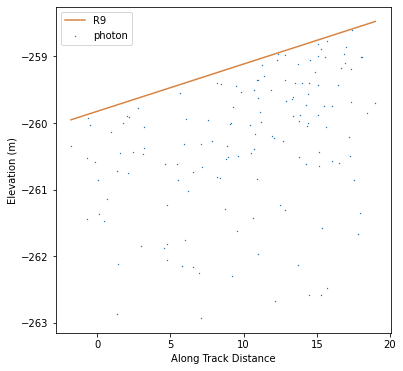

In [116]:
r.plot()

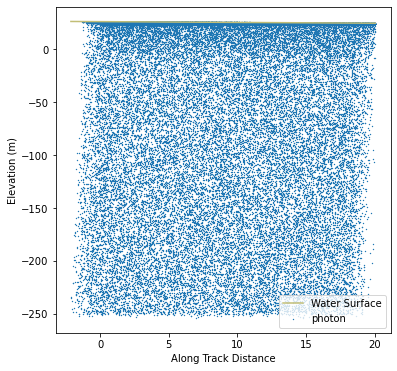

In [10]:
line_test = pysat.ATL03(filename).gt2r.RANSAC("Water Surface").below("Water Surface").plot()

In [11]:
def hl(c):
    def horizontal_line(d):
        return c
    return horizontal_line

line = hl(line_test["Water Surface"]["height"].mean() - 50.0)

line_test = line_test.add_modeled_surface("bottom", line, line_test["Water Surface"]["distance"])

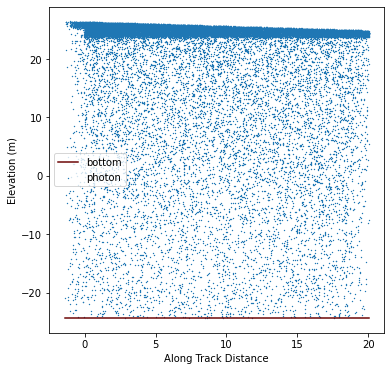

In [12]:
line_test = line_test.above("bottom").plot()

In [14]:
wave_test = line_test.bin(win_h=0.1, win_x=19.9)[0][1]

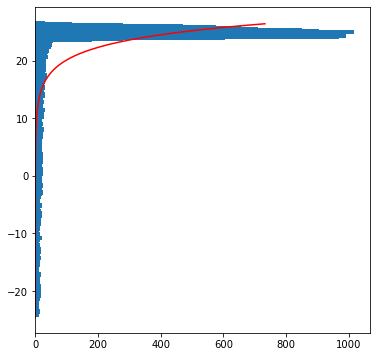

In [17]:
t = wave_test.fit_curve().plot()

In [19]:
t.curve_params["c"]

-0.316676829340024